# Data Cleaning   

Put something here about where the data comes from, link to kaggle, etc etc, sketch out cleaning priorities:
- correct format
- set target


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import ast #converting column values to lists post-import from csv

from nltk import FreqDist


In [4]:
df = pd.read_csv('foodcom_recipes_with_classification.csv')
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494963 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   494963 non-null  int64 
 1   name                 494963 non-null  object
 2   description          485365 non-null  object
 3   ingredients          494963 non-null  object
 4   ingredients_raw_str  494963 non-null  object
 5   serving_size         494963 non-null  object
 6   servings             494963 non-null  int64 
 7   steps                494963 non-null  object
 8   tags                 494963 non-null  object
 9   search_terms         494963 non-null  object
dtypes: int64(2), object(8)
memory usage: 37.8+ MB


Going to remove the rows with null values in the "description" column. While this removes ~9,500 rows of data the overall scale of the dataset can support the loss.

In [6]:
df['description'].isna().sum()

9598

In [7]:
df = df.dropna(subset=['description'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485365 entries, 0 to 494962
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   485365 non-null  int64 
 1   name                 485365 non-null  object
 2   description          485365 non-null  object
 3   ingredients          485365 non-null  object
 4   ingredients_raw_str  485365 non-null  object
 5   serving_size         485365 non-null  object
 6   servings             485365 non-null  int64 
 7   steps                485365 non-null  object
 8   tags                 485365 non-null  object
 9   search_terms         485365 non-null  object
dtypes: int64(2), object(8)
memory usage: 40.7+ MB


In [9]:
df_sample = df.iloc[:25]
len(df_sample)

25

### Converting Column Data to Lists  

There are a number of columns in the dataset that, when viewed, appeared to be list types.  However when you test this using the type() function they are actually strings.

In [10]:
# looking at an example from  the 'ingredients' column and comparing it against its type
df['ingredients'].iloc[0]

"['water', 'grits', 'salt', 'cheddar cheese', 'garlic', 'olive oil']"

In [11]:
type(df['ingredients'].iloc[0]) 

str

The below function converts strings that look like lists into actual lists.

In [12]:
def return_to_list(df, column_names):
    ''' Takes in list of names of columns containing strings and the dataframe they sit in and returns converts each column's contents into a new
    column, called '<original column name>_list', now as lists. May only work on strings that look like lists.... 
    
    Inputs:
    df = dataframe with columns being converted to lists
    column_names = list of columns whose contents need to be transformed
    
    Returns: updated dataframe
    '''
    for col in column_names:
        col_name = col + '_list'
        df[col_name] = [ast.literal_eval(x) for x in df[col] ]
    
    return df

In [13]:
# list of list-appearing columns
col_to_list = ['ingredients', 'ingredients_raw_str', 'steps', 'tags', 'search_terms']

In [14]:
# running dataframe through custom function 
df = return_to_list(df, col_to_list)

In [15]:
df_sample = return_to_list(df_sample, col_to_list)

<ipython-input-12-93f71f895b50>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = [ast.literal_eval(x) for x in df[col] ]


In [16]:
# confirming new columns have been created
df.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","{vegetarian, side, low-calorie, diabetic, low-..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","{shrimp, dinner}"
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","{vegetarian, italian, side}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",{dinner}
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",{dessert}


In [17]:
# confirming type 
type(df['ingredients_list'].iloc[0]) 

list

In [18]:
# one addtional step needs to be taken - becasue the data in the "search_terms" column was enclosed in curly brackets 
# their contents were transformed into a set.  
type(df['search_terms_list'].iloc[0]) 

set

In [19]:
# For the sake of uniformity "search_terms_list" is converted into a list
df['search_terms_list'] = df['search_terms_list'].apply(lambda x: list(x))

In [20]:
type(df['search_terms_list'].iloc[0])

list

## Setting the Target Variable 

- Find recipes that have "dinner" as a search term (meal type is not a tag but it is included in search terms)
- Create list of tags that are appropriate for the goal of creating a model that will find easy dinner recipes 
    - 30-minutes-or-less
    - easy
    - 5-ingredients-or-less 
- Create a target column identifying what recipes fall into both groups 

### Tag Data Targets

In [21]:
def lists_to_count(df, column):
    ''' takes in a column of lists and returns counts for all unique values. 
    
    Inputs:
    df - dataframe with column being converted
    column - column of lists
    
    Returns: 
    Series with unique value counts
    '''
    
#     df = df.explode(column)
    
#     col_count = df[column].value_counts()

    all_col = df[column].explode()
    col_count = FreqDist(all_col)
    
    return col_count
  


In [22]:
tag_dist = lists_to_count(df, 'tags_list')
type(tag_dist)

nltk.probability.FreqDist

In [23]:
len(tag_dist)

631

In [24]:
tag_dist.items()

dict_items([('time-to-make', 468733), ('course', 456982), ('main-ingredient', 338258), ('preparation', 481640), ('occasion', 219826), ('side-dishes', 51423), ('eggs-dairy', 55963), ('refrigerator', 8106), ('diabetic', 13116), ('vegetarian', 67456), ('grains', 10953), ('cheese', 27244), ('stove-top', 36171), ('dietary', 320987), ('low-cholesterol', 75370), ('low-calorie', 74293), ('comfort-food', 46037), ('low-carb', 86715), ('low-in-something', 177050), ('pasta-rice-and-grains', 52255), ('brunch', 35956), ('taste-mood', 95674), ('equipment', 116531), ('presentation', 45099), ('served-hot', 22770), ('4-hours-or-less', 109958), ('60-minutes-or-less', 151450), ('main-dish', 148240), ('pork', 23830), ('seafood', 30598), ('easy', 256604), ('shrimp', 8632), ('one-dish-meal', 33919), ('meat', 111602), ('pork-sausage', 4120), ('shellfish', 14688), ('weeknight', 43228), ('vegetables', 102993), ('beginner-cook', 65187), ('fall', 13610), ('winter', 13229), ('crock-pot-slow-cooker', 11553), ('seas

Quick visualizations of the tag frequencies

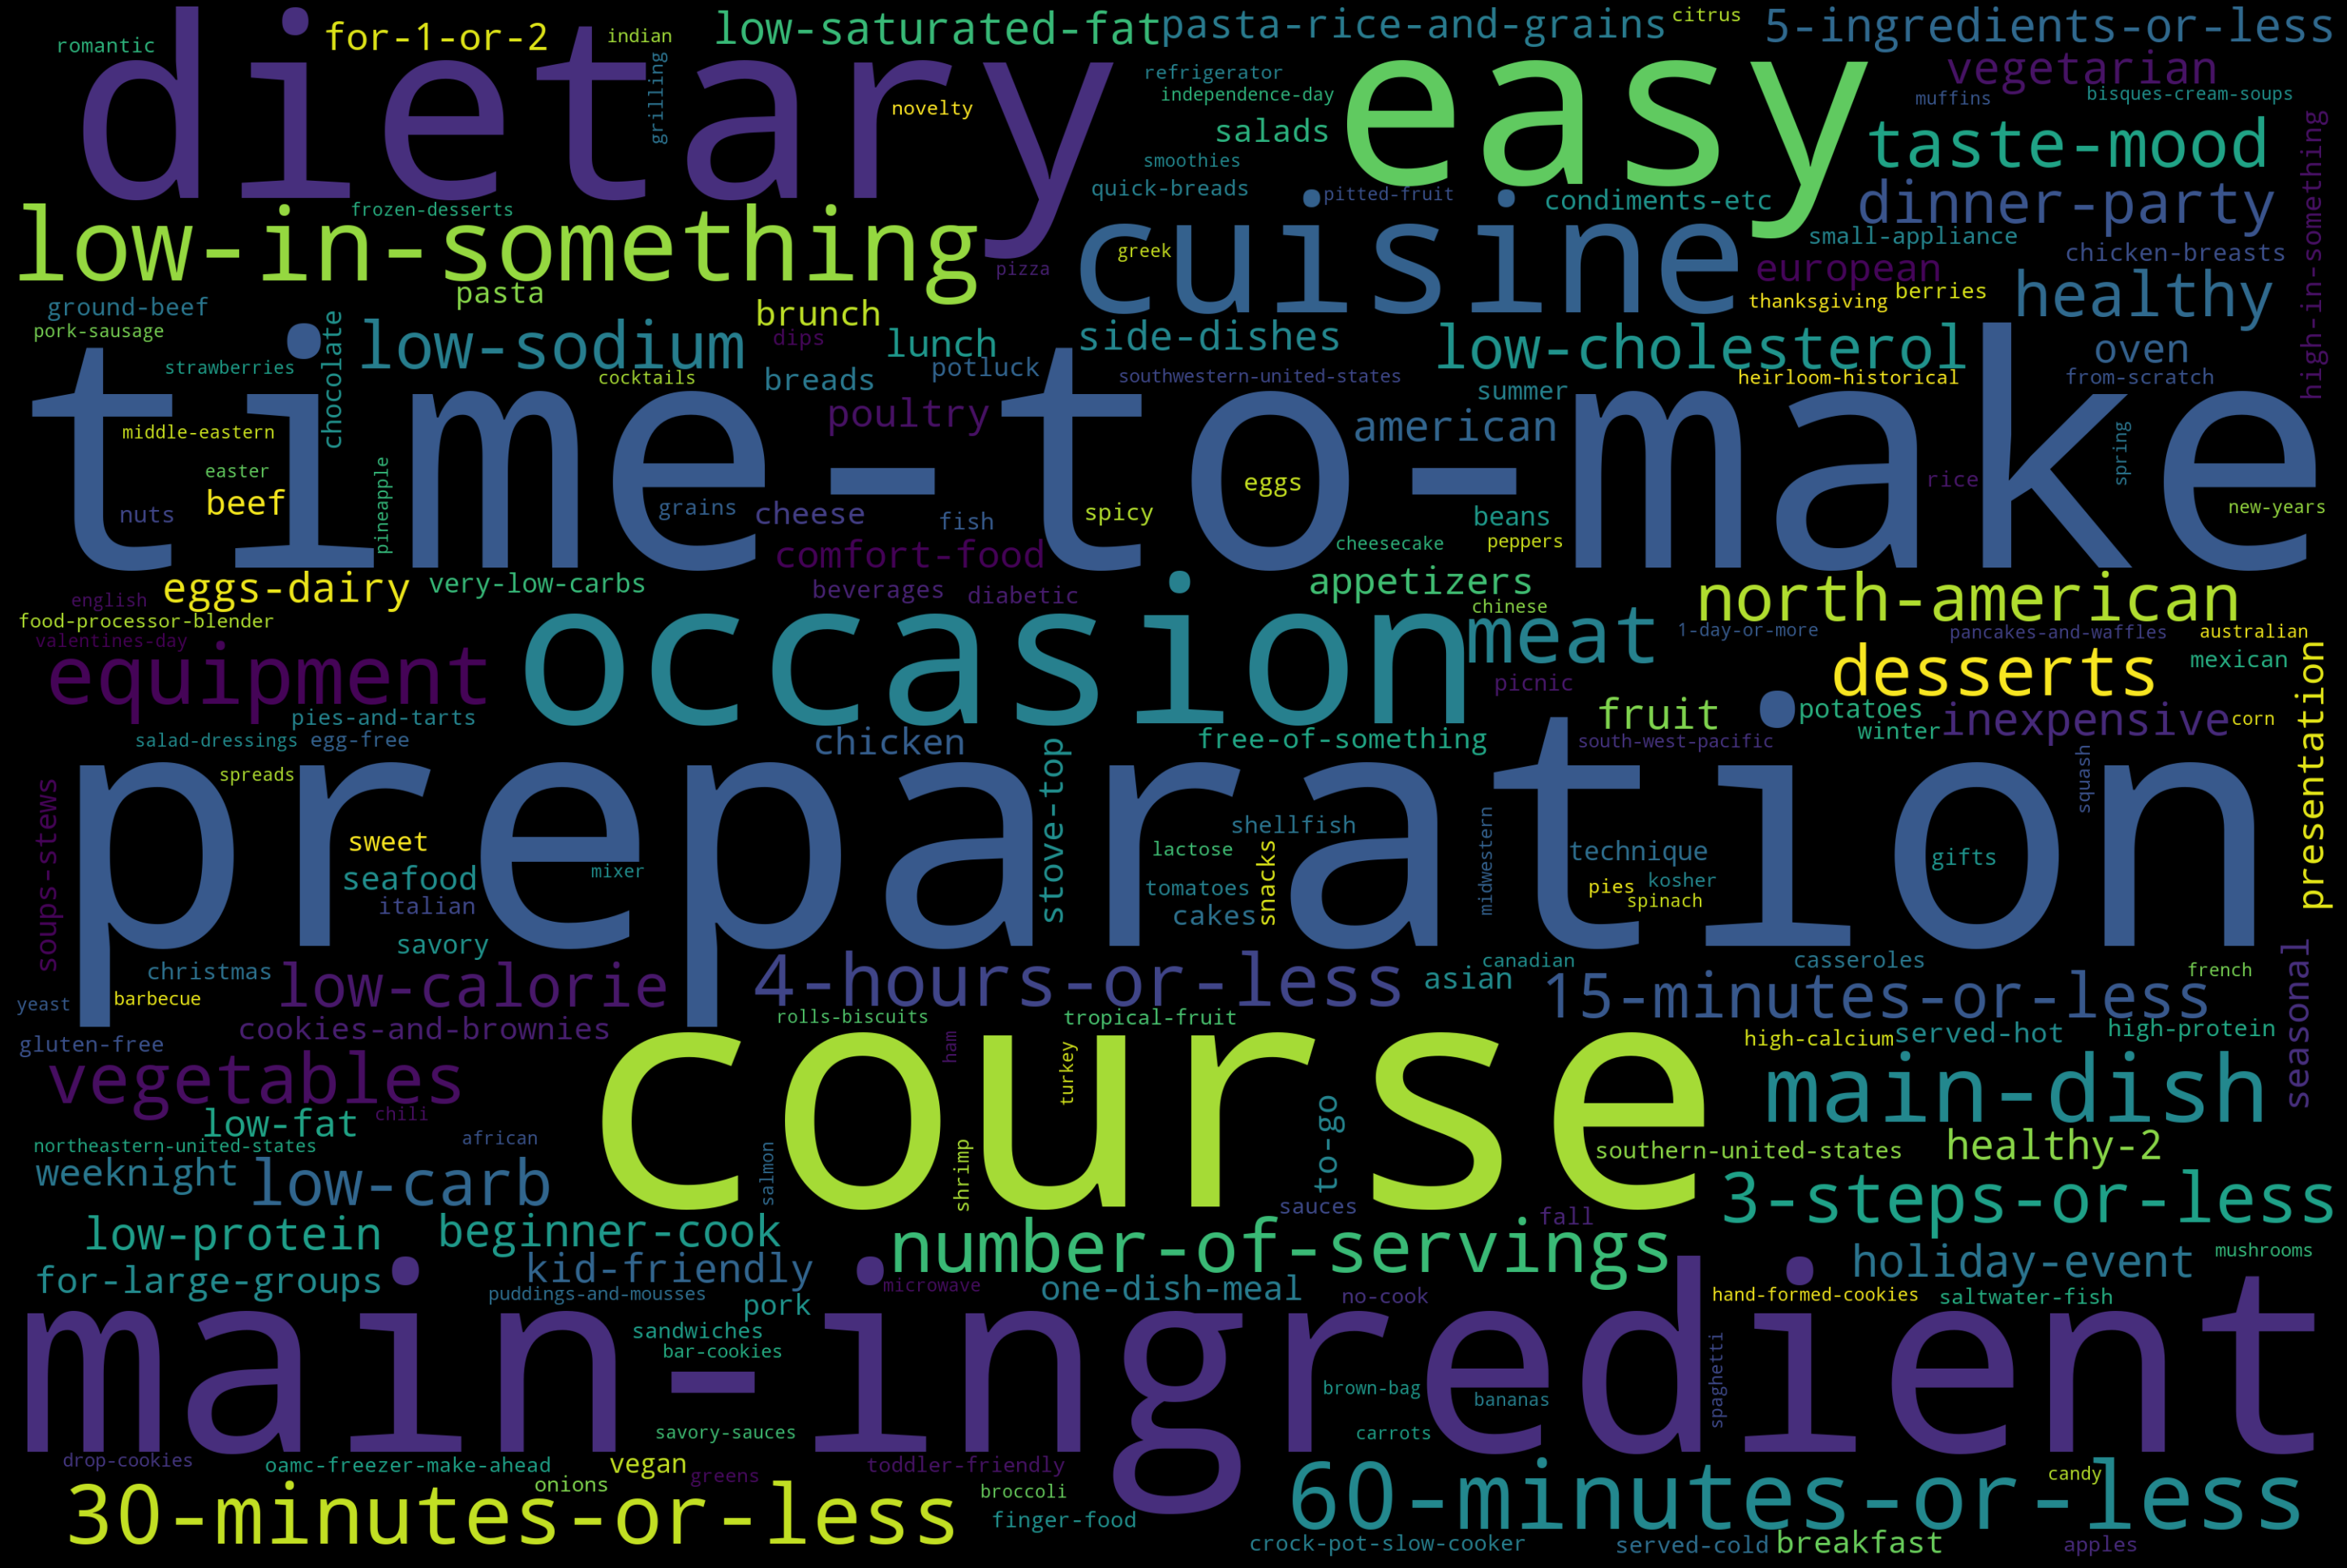

In [25]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate_from_frequencies(dict(tag_dist))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:

#function for visualizing the most frequent tokens within a frequency distribution
def visualize_tokens(freq_dist, number, title):
    '''
    From Phase 4 Project: 
    https://github.com/CGPinDC/Tweet_NLP_Project/blob/main/Tweet_Sentiment_%20Analysis_Notebook.ipynb
    
    freq_dist: pass in frequency dictionary of tokens. 
    number: number as integer of the top tokens to return
    
    title: title of graph
    '''
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MaxNLocator

    # get tokens and frequency counts from freq_dist
    top = list(zip(*freq_dist.most_common(number)))
    tokens = top[0]
    counts = top[1]
    
    print(f'Top Tokens: {tokens[:number]}')

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

Top Tokens: ('preparation', 'time-to-make', 'course', 'main-ingredient', 'dietary', 'easy', 'occasion', 'cuisine', 'low-in-something', '60-minutes-or-less', 'main-dish', 'equipment', '30-minutes-or-less', 'meat', 'number-of-servings', '4-hours-or-less', 'vegetables', '3-steps-or-less', 'desserts', 'taste-mood', 'north-american', 'low-sodium', 'low-carb', 'healthy', '15-minutes-or-less', 'low-cholesterol', 'low-calorie', 'dinner-party', '5-ingredients-or-less', 'low-protein', 'vegetarian', 'beginner-cook', 'holiday-event', 'low-saturated-fat', 'inexpensive', 'american', 'fruit', 'eggs-dairy', 'healthy-2', 'pasta-rice-and-grains', 'side-dishes', 'oven', 'kid-friendly', 'european', 'poultry', 'comfort-food', 'presentation', 'appetizers', 'low-fat', 'lunch')


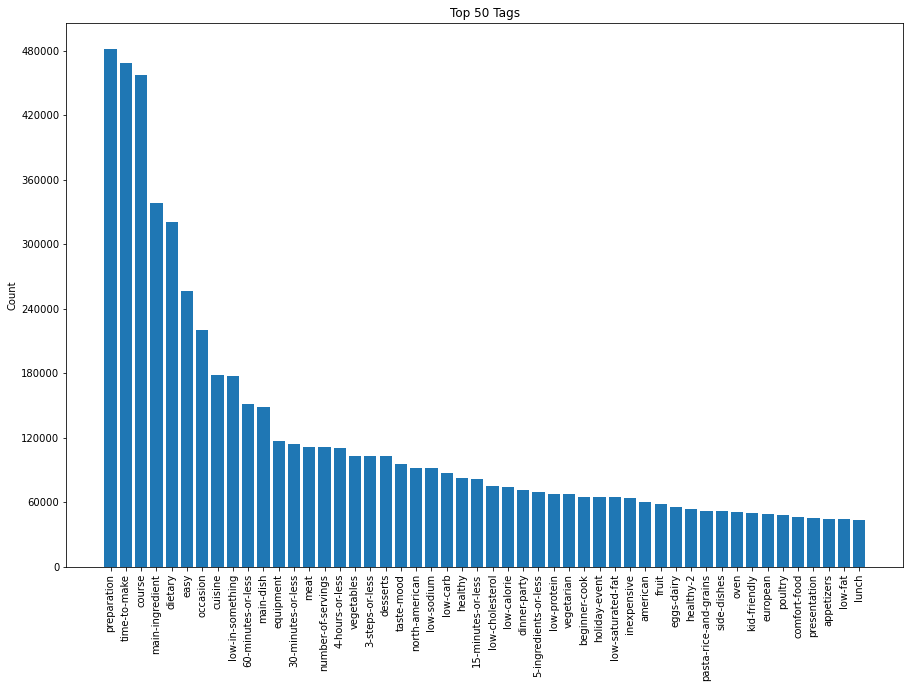

In [27]:
visualize_tokens(tag_dist, 50, "Top 50 Tags")

Since there are only 631 distinct tags I can review them one-by-one to select the ones that best fit into the "easy" category.

In [28]:
for tag in list(tag_dist):
    print(tag)

preparation
time-to-make
course
main-ingredient
dietary
easy
occasion
cuisine
low-in-something
60-minutes-or-less
main-dish
equipment
30-minutes-or-less
meat
number-of-servings
4-hours-or-less
vegetables
3-steps-or-less
desserts
taste-mood
north-american
low-sodium
low-carb
healthy
15-minutes-or-less
low-cholesterol
low-calorie
dinner-party
5-ingredients-or-less
low-protein
vegetarian
beginner-cook
holiday-event
low-saturated-fat
inexpensive
american
fruit
eggs-dairy
healthy-2
pasta-rice-and-grains
side-dishes
oven
kid-friendly
european
poultry
comfort-food
presentation
appetizers
low-fat
lunch
for-1-or-2
weeknight
chicken
seasonal
for-large-groups
stove-top
brunch
one-dish-meal
beef
to-go
seafood
salads
breakfast
breads
cookies-and-brownies
cheese
soups-stews
asian
pasta
pork
free-of-something
served-hot
cakes
high-in-something
condiments-etc
sweet
very-low-carbs
technique
savory
potatoes
vegan
chocolate
beans
summer
potluck
eggs
chicken-breasts
snacks
ground-beef
beverages
italian
ch

Recipes tagged with the following will be included in the target:

easy     
30-minutes-or-less  
3-steps-or-less  
15-minutes-or-less                        
beginner-cook                                     

The following tags were also discovered during the review.  While consisting of a small number of recipes overall since they are not for food recipes containing these tags will be removed.

bath-beauty                                            
household-cleansers               
homeopathy-remedies             



In [29]:
target_tags = ['easy','30-minutes-or-less', '3-steps-or-less', '15-minutes-or-less', 'beginner-cook']

In [30]:
tags_to_remove = ['bath-beauty', 'household-cleaners', 'homeopathy-remedies']

In [31]:
def in_list(cell_val_list, tag_list):
    ''' returns a one if values in cell_val_list are found in tag_list
    
    Input:
    cell_val_list = list to check for values
    tag_list = list to check against'''
    
    is_in = 0
    
    for x in cell_val_list:
        if x in tag_list:
            is_in = 1
            
    return 1

In [32]:
df['remove'] = df['tags_list'].map(lambda x: any(tag in x for tag in tags_to_remove))


In [33]:
df['remove'].value_counts()

False    485306
True         59
Name: remove, dtype: int64

In [34]:
df = df[df['remove'] != True]

In [35]:
df['remove'].value_counts()

False    485306
Name: remove, dtype: int64

### Search Term Target

In [36]:
search_term_dist = lists_to_count(df, 'search_terms_list')
type(search_term_dist)

nltk.probability.FreqDist

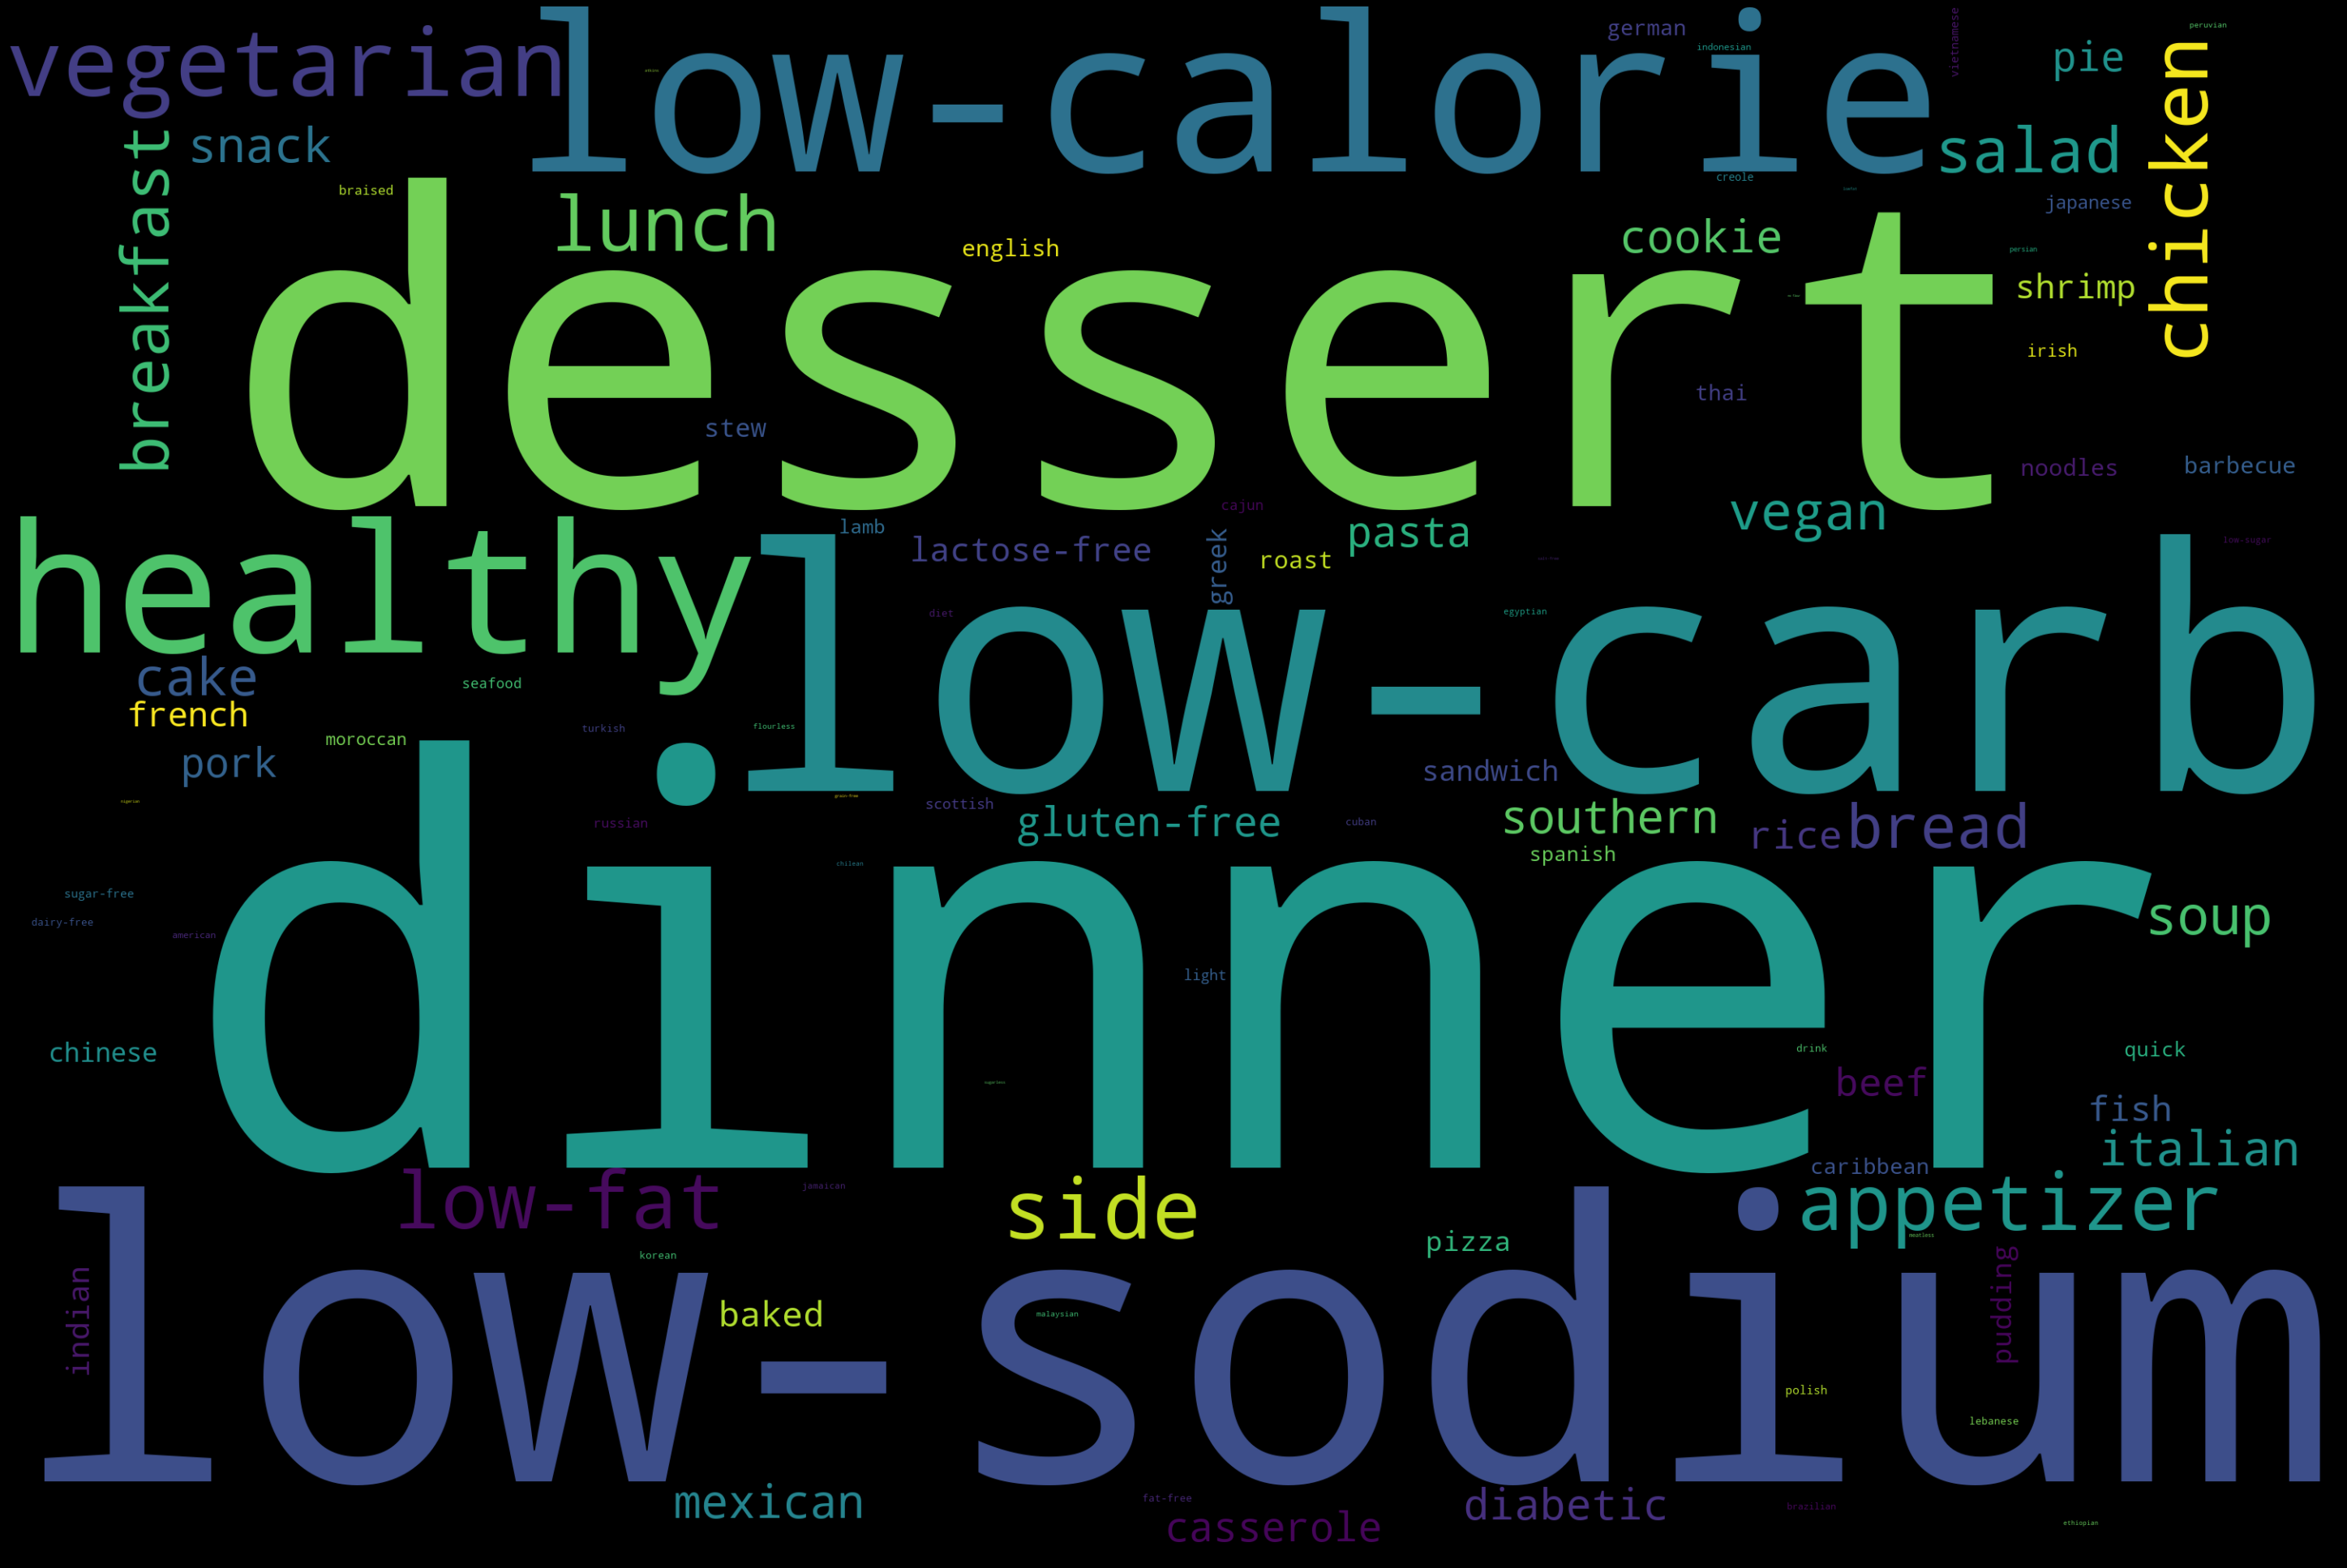

In [37]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate_from_frequencies(dict(search_term_dist))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Top Tokens: ('dinner', 'dessert', 'low-sodium', 'low-carb', 'low-calorie', 'healthy', 'vegetarian', 'side', 'low-fat', 'appetizer', 'chicken', 'lunch', 'breakfast', 'salad', 'bread', 'soup', 'vegan', 'cake', 'italian', 'snack', 'mexican', 'southern', 'cookie', 'diabetic', 'pasta', 'casserole', 'pork', 'pie', 'gluten-free', 'beef', 'rice', 'baked', 'fish', 'french', 'shrimp', 'lactose-free', 'indian', 'sandwich', 'pizza', 'pudding', 'chinese', 'greek', 'stew', 'roast', 'noodles', 'english', 'barbecue', 'thai', 'caribbean', 'german')


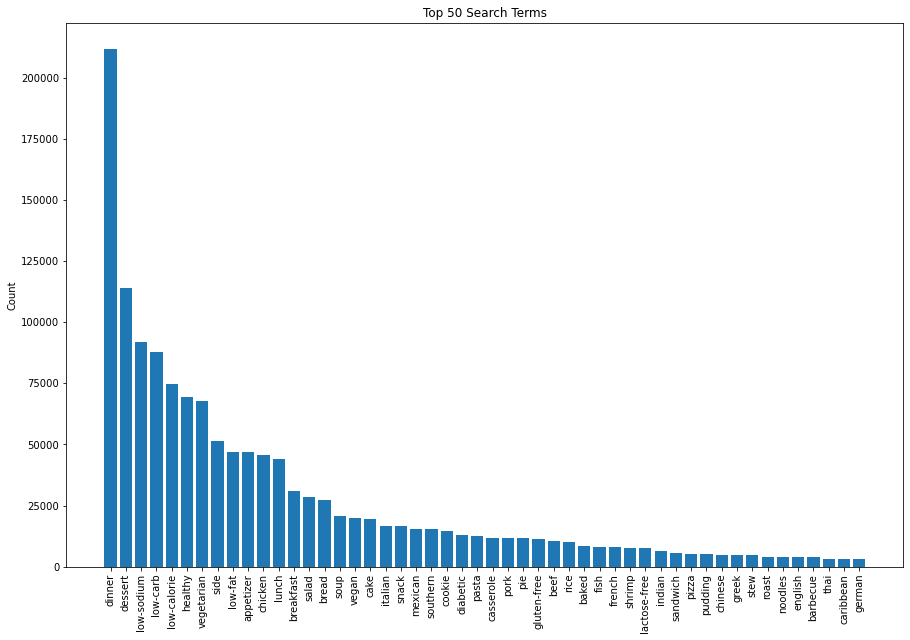

In [38]:
visualize_tokens(search_term_dist, 50, "Top 50 Search Terms")

In [39]:
len(search_term_dist)

98

In [40]:
for term in list(search_term_dist):
    print(term)

dinner
dessert
low-sodium
low-carb
low-calorie
healthy
vegetarian
side
low-fat
appetizer
chicken
lunch
breakfast
salad
bread
soup
vegan
cake
italian
snack
mexican
southern
cookie
diabetic
pasta
casserole
pork
pie
gluten-free
beef
rice
baked
fish
french
shrimp
lactose-free
indian
sandwich
pizza
pudding
chinese
greek
stew
roast
noodles
english
barbecue
thai
caribbean
german
quick
spanish
lamb
japanese
irish
moroccan
light
scottish
cajun
seafood
russian
braised
polish
vietnamese
sugar-free
creole
korean
cuban
drink
turkish
lebanese
diet
dairy-free
fat-free
brazilian
indonesian
american
egyptian
jamaican
low-sugar
peruvian
malaysian
flourless
persian
ethiopian
chilean
meatless
atkins
nigerian
grain-free
lowfat
sugarless
salt-free
no flour
no meat
carb-free
sodium-free
flour-less


In [41]:
search_term_dist['quick']

2619

Reviewing the search terms confirms that the only one that's going to be used to create this target variable is "dinner".  While there is a "quick" search term it applies to only 2,600 recipes, not a material amount. Additionally "quick" recipes are not automatically "dinner" recipes so their inclusion as a target parameter potentially adds bad data to the target set.

In [42]:
search_term_dist['dinner']

211764

In [43]:
target_search_term = ['dinner']

### Creating Initial Target

In [44]:
df['target_tag'] = df['tags_list'].map(lambda x: any(tag in x for tag in target_tags))
df['target_tag'].value_counts(normalize=True)

True     0.656139
False    0.343861
Name: target_tag, dtype: float64

In [45]:
df

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,remove,target_tag
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[vegetarian, side, low-calorie, diabetic, low-...",False,False
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[shrimp, dinner]",False,True
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[vegetarian, italian, side]",False,True
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],False,True
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494958,276465,Blackberry Orange Scones,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",1 (83 g),8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}","[unbleached flour, baking soda, butter, orange...","[2 1/2 cups unbleached flour, 2 teaspoon...",[Sift about 2 cups of flour onto a piece of wa...,"[30-minutes-or-less, time-to-make, course, pre...","[breakfast, bread]",False,True
494959,257796,Slow Cooker Garlic Chicken With Rosemary,Delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...","[""1 (5 lb) roasting chickens, rinsed and ...",1 (340 g),6,"['Place rosemary springs, 1 lemon half, celery...","['main-ingredient', 'preparation', 'occasion',...","{'dinner', 'chicken'}","[roasting chickens, lemons, rosemary

Reviewing the above dataframe output I saw the last row contained a recipe with the '60-minutes-or-less' tag but also had one of the target tags.  Seeing how a recipe cold conceivably, if over-optimistically, be tagged with both 'easy' and '60-minutes-or-less', and because this model seeks to find recipes that are both quick and simple, going to reset the "target_tag" value to "False" if the tag list contains "60-minutes-or-less" . 

In [46]:
def hour_check(x):
    if '60-minutes-or-less' in x: 
        return False
    else:
        return True


In [47]:
df

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,remove,target_tag
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[vegetarian, side, low-calorie, diabetic, low-...",False,False
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[shrimp, dinner]",False,True
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[vegetarian, italian, side]",False,True
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],False,True
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494958,276465,Blackberry Orange Scones,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",1 (83 g),8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}","[unbleached flour, baking soda, butter, orange...","[2 1/2 cups unbleached flour, 2 teaspoon...",[Sift about 2 cups of flour onto a piece of wa...,"[30-minutes-or-less, time-to-make, course, pre...","[breakfast, bread]",False,True
494959,257796,Slow Cooker Garlic Chicken With Rosemary,Delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...","[""1 (5 lb) roasting chickens, rinsed and ...",1 (340 g),6,"['Place rosemary springs, 1 lemon half, celery...","['main-ingredient', 'preparation', 'occasion',...","{'dinner', 'chicken'}","[roasting chickens, lemons, rosemary

In [48]:
# owe credit to first response on https://stackoverflow.com/questions/58562662/apply-function-on-subset-of-dataframe-rows-in-column-based-on-value-in-other-col
# for helping me figure out how to re-label the 'target_tag' column
df['target_tag'] = df.apply(lambda row:
    hour_check(row.tags_list) if row.target_tag == True else row.target_tag, axis=1)

In [49]:
df['target_tag'].value_counts(normalize=True)

True     0.517261
False    0.482739
Name: target_tag, dtype: float64

In [50]:
df['target_search_term'] = df['search_terms_list'].map(lambda x: any(term in x for term in target_search_term))
df['target_search_term'].value_counts(normalize=True)

False    0.563649
True     0.436351
Name: target_search_term, dtype: float64

In [51]:
def target_check(x):
    ''' dataframe specific function to set rows as meeting the conditions for the target variable or not'''
    if (x['target_tag'] == True) and (x['target_search_term'] == True):
        return 1
    else:
        return 0

In [52]:
df['target'] = df.apply(target_check, axis=1)
df

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,ingredients_list,ingredients_raw_str_list,steps_list,tags_list,search_terms_list,remove,target_tag,target_search_term,target
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...","[water, grits, salt, cheddar cheese, garlic, o...","[4 cups water, 1 cup uncooked old fas...","[I a sauce pan, bring water to a boil; slowly ...","[time-to-make, course, main-ingredient, prepar...","[vegetarian, side, low-calorie, diabetic, low-...",False,False,False,0
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}","[onion, red bell pepper, garlic cloves, large ...","[1 medium onion, chopped coarse , 1 med...","[In a food processor, pulse the onion, red pep...","[60-minutes-or-less, time-to-make, course, mai...","[shrimp, dinner]",False,False,True,0
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}","[zucchini, yellow squash, diced tomatoes, onio...","[2 zucchini, sliced , 2 small yello...",[Put all ingredients in the crock pot and cook...,"[weeknight, time-to-make, course, main-ingredi...","[vegetarian, italian, side]",False,True,False,0
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},"[beef stew meat, flour, salt, allspice, cinnam...","[3 lbs beef stew meat, 3 tablespoons ...","[Preheat oven to 350°F., Cut beef into 1 inch ...","[time-to-make, course, main-ingredient, prepar...",[dinner],False,True,True,1
5,232050,Hot Sweet Almond Brittle,This is one of our standard holiday gift recip...,"['slivered almonds', 'cider vinegar', 'sugar',...","[""12 ounces slivered almonds"",""1/4 cup ...",1 (832 g),1,['Preheat oven to 375°F Place almonds in sing...,"['time-to-make', 'course', 'preparation', 'des...",{'dessert'},"[slivered almonds, cider vinegar, sugar, sugar...","[12 ounces slivered almonds, 1/4 cup ...",[Preheat oven to 375°F Place almonds in singl...,"[time-to-make, course, preparation, desserts, ...",[dessert],False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494958,276465,Blackberry Orange Scones,"The orange zest makes for a flavorful, not ove...","['unbleached flour', 'baking soda', 'butter', ...","[""2 1/2 cups unbleached flour"",""2 teaspo...",1 (83 g),8,['Sift about 2 cups of flour onto a piece of w...,"['30-minutes-or-less', 'time-to-make', 'course...","{'breakfast', 'bread'}","[unbleached flour, baking soda, butter, orange...","[2 1/2 cups unbleached flour, 2 teaspoon...",[Sift about 2 cups of flour onto a piece of wa...,"[30-minutes-or-less, time-to-make, course, pre...","[breakfast, bread]",False,True,False,0
494959,257796,Slow Cooker Garlic Chicken With Rosemary,Delicious and easy!,"['roasting chickens', 'lemons', 'rosemary spri...","[""1 (5 lb) roasting chickens, rinsed and ...",1 (340 g),6,"['Place rosemary springs, 1 lemon half, celery...","['main-ingredient', 'preparatio

In [53]:
df['target'].value_counts(normalize=True)

0    0.796794
1    0.203206
Name: target, dtype: float64

The above establishes the baseline for subsequent model performance - needs to correctly pick "easy" recipes at least 20% of the time to be better then guessing.

In [54]:
#Cleaning up the dataframe slightly 
df.drop(['remove'], axis=1, inplace = True)

### Exporting the Data

Before exporting the data the "_list" columns will be removed - the "return_to_list" function will have to be run on the dataset when imported to new notebooks so no need to include them in the export. 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485306 entries, 0 to 494962
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        485306 non-null  int64 
 1   name                      485306 non-null  object
 2   description               485306 non-null  object
 3   ingredients               485306 non-null  object
 4   ingredients_raw_str       485306 non-null  object
 5   serving_size              485306 non-null  object
 6   servings                  485306 non-null  int64 
 7   steps                     485306 non-null  object
 8   tags                      485306 non-null  object
 9   search_terms              485306 non-null  object
 10  ingredients_list          485306 non-null  object
 11  ingredients_raw_str_list  485306 non-null  object
 12  steps_list                485306 non-null  object
 13  tags_list                 485306 non-null  object
 14  sear

In [58]:
col_remove = ['ingredients_list', 'ingredients_raw_str_list', 'steps_list',
              'tags_list', 'search_terms_list']

In [59]:
df.drop(col_remove, axis=1, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485306 entries, 0 to 494962
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   485306 non-null  int64 
 1   name                 485306 non-null  object
 2   description          485306 non-null  object
 3   ingredients          485306 non-null  object
 4   ingredients_raw_str  485306 non-null  object
 5   serving_size         485306 non-null  object
 6   servings             485306 non-null  int64 
 7   steps                485306 non-null  object
 8   tags                 485306 non-null  object
 9   search_terms         485306 non-null  object
 10  target_tag           485306 non-null  bool  
 11  target_search_term   485306 non-null  bool  
 12  target               485306 non-null  int64 
dtypes: bool(2), int64(3), object(8)
memory usage: 45.4+ MB


In [61]:
df.to_csv('data/recipe_data_w_target.csv')